# Machine Learning Task Solution

### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# The dataset for this task is from https://www.kaggle.com/rounakbanik/the-movies-dataset/version/7?select=movies_metadata.csv

In [3]:
!unzip movies_metadata.csv.zip

Archive:  movies_metadata.csv.zip
  inflating: movies_metadata.csv     


In [4]:
# Set some parameters for displaying the dataframes.
plt.rcParams["figure.figsize"] = (14,5)
pd.set_option('display.max_rows', 700)
pd.set_option('display.max_columns', 700)
pd.set_option('display.width', 2000)

# Reading Data and Data Manipulation.

In [ ]:
!unzip movies_metadata.csv.zip

In [5]:
df = pd.read_csv('./movies_metadata.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [7]:
# Extract only relevant columns as Overview and Title are the inputs to the model, and Genre being the output.
df_subset = df[['genres','title','overview']]

In [8]:
#The genre column is in json format, the genres have to be somehow extracted.
df_subset.head(3)

,genres,title,overview
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji,When siblings Judy and Peter discover an encha...
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men,A family wedding reignites the ancient feud be...


In [9]:
import ast

In [10]:
#Convert string representation of values to dictionaries.
for i,row in df_subset.iterrows():
    df_subset.at[i,'genres'] = ast.literal_eval(row[0])

In [11]:
new_df = pd.DataFrame([],columns=['genre','title','description'])

In [12]:
#Reformat the dataframe to triples of title, overview and genre
Idx=df_subset.set_index(['title','overview']).genres.apply(pd.Series).stack().index
new_df = pd.DataFrame(df_subset.set_index(['title','overview']).genres.apply(pd.Series).stack().values.tolist(),index=Idx).reset_index().drop('level_2',1)

In [13]:
new_df.columns = ['title','overview','id','genre']
new_df.head(5)

,title,overview,id,genre
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",16,Animation
1,Toy Story,"Led by Woody, Andy's toys live happily in his ...",35,Comedy
2,Toy Story,"Led by Woody, Andy's toys live happily in his ...",10751,Family
3,Jumanji,When siblings Judy and Peter discover an encha...,12,Adventure
4,Jumanji,When siblings Judy and Peter discover an encha...,14,Fantasy


# Exploratory Data Analysis

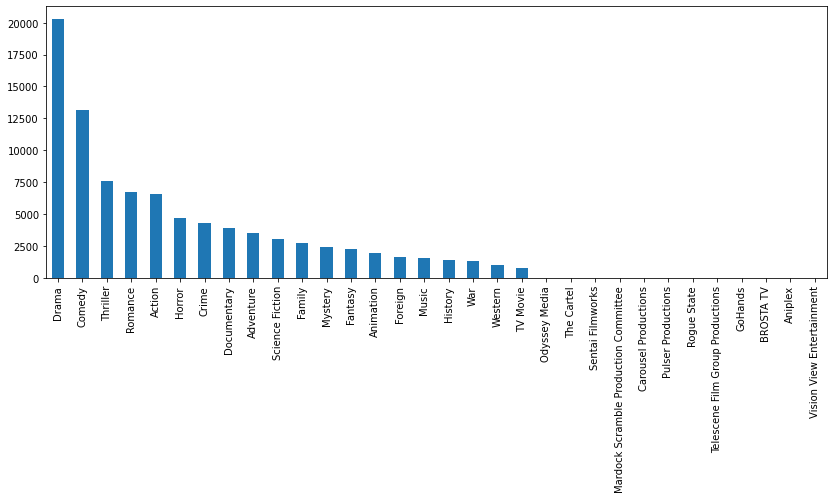

In [14]:
#Plot genre counts in the dataframe. 
new_df['genre'].value_counts().plot(kind='bar')

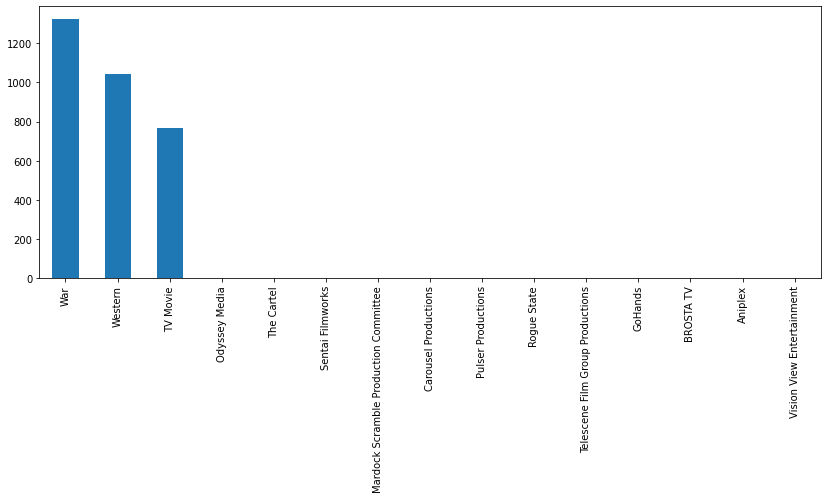

In [15]:
new_df['genre'].value_counts()[-15:].plot(kind='bar')

In [16]:
print('Maximium number of words in any description: ', new_df.overview.str.split().str.len().max())
print('Minimum number of words in any description: ', new_df.overview.str.split().str.len().min())
print('Average description length: ', new_df.overview.str.split().str.len().mean())
print('Median description length: ', new_df.overview.str.split().str.len().median())
print('Stdev description length: ', new_df.overview.str.split().str.len().std())
print('Average number of genres per movie', new_df['title'].value_counts().mean())
print('Top 10 most represented movies in the dataset\n', new_df['title'].value_counts()[:10])

Maximium number of words in any description:  187.0
Minimum number of words in any description:  0.0
Average description length:  55.3079315362145
Median description length:  49.0
Stdev description length:  34.06027787861397
Average number of genres per movie 2.275134257524666
Top 10 most represented movies in the dataset
 Cinderella                            31
Alice in Wonderland                   26
The Hound of the Baskervilles         22
The Three Musketeers                  22
Beauty and the Beast                  21
Les Misérables                        19
Sahara                                17
Journey to the Center of the Earth    17
Chaos                                 16
A Christmas Carol                     16
Name: title, dtype: int64


# Problem Formulation

In [17]:
# The problem is a multi-label classification task. 
# Each input vector containing description is mapped to 1 or more genres
# Therefore, the target vector of each entry is a binary vector representing the presence of genres, that is filled
# with 1's if the entry contains the genre and 0 if it does not.

# For example: The movie 'Othello' will have one 1 present at first position (Drama) and every other position will 
# be fileld with zeros.

In [18]:
# The dataset is heavily imbalanced. Some genre categories [Drama or Comedy] are more present than others.
# Drama has 20,000 occurences and Mystery around 2500.

#Subset the top 20 genres only, as the remaining 12 are deemed not significantly representable. (They have just 1 occurence)

new_df = new_df.loc[new_df['genre'].isin(new_df['genre'].value_counts()[:20].keys())]

In [19]:
# Use the group-by function of pandas to create the binary vectors of genre presence.
grouped = new_df.groupby(['title','overview','genre']).size().unstack().fillna(0).reset_index()

In [20]:
grouped.head(3)

genre,title,overview,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,!Women Art Revolution,"Through intimate interviews, provocative art, ...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,#1 Cheerleader Camp,A pair of horny college guys get summer jobs a...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,#Horror,"Inspired by actual events, a group of 12 year ...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# Model Selection

### This task can be solved using various methods, for example: Decision Trees, OneVRest group of classifiers, Binary Relevance, LSTM's but the chosen approach is a model from the Transformer class. The reason being for this is the proven accuracy of Transformers on NLP tasks and their ease to use with GPU. 


In [21]:
!pip install transformers
import tensorflow as tf
import torch
from torch.nn import BCEWithLogitsLoss, BCELoss
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix, f1_score, accuracy_score
import pickle
import transformers
from tqdm import tqdm, trange
from ast import literal_eval
!pip install sentencepiece
from transformers import AdamW

     |████████████████████████████████| 2.3MB 34.0MB/s 
     |████████████████████████████████| 901kB 48.0MB/s 
     |████████████████████████████████| 3.3MB 51.3MB/s 
     |████████████████████████████████| 1.2MB 29.8MB/s 


In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [23]:
# Split the dataframe into train and test (80-20), keep the Test split for later.
# K fold cross validation could be used too but that would take K-times the training time. (Too much now)

msk = np.random.rand(len(grouped)) < 0.8
train = grouped[msk]
test = grouped[~msk]

In [24]:
cols = train.columns # Get names of all columns
label_cols = list(cols[2:]) # Get column names
num_labels = len(label_cols) # Get number of unique genres types used in classification.
train = train.sample(frac=1).reset_index(drop=True)

In [25]:
train['one_hot_labels'] = list(train[label_cols].values) #Create one hot vectors for all rows

In [26]:
labels = list(train.one_hot_labels.values) #Get the binary one hot vectors from dataframe.
comments = list(train.overview.values) # Get text data from dataframe.

## Text Preprocessing

In [27]:
### Notice how the standard preprocessing is not performed. (Stop word removal, lemmatisation, special character striping)
### This way the Transformer model learns the whole context of all sentences rather than compressed information.

from transformers import BertTokenizer
max_length = 100
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True) # Use the tokenizer from huggingface library.

# Encode the descriptions to a 100 long vector and pad with 0 if needed.
encodings = tokenizer.batch_encode_plus(comments,max_length=max_length,pad_to_max_length=True)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2110: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [28]:
input_ids = encodings['input_ids'] # Get tokenized and encoded text.
token_type_ids = encodings['token_type_ids'] # Get token type ids.
attention_masks = encodings['attention_mask'] # Get the attention masks.

In [29]:
label_counts = train.one_hot_labels.astype(str).value_counts()
one_freq = label_counts[label_counts==1].keys()
one_freq_idxs = sorted(list(train[train.one_hot_labels.astype(str).isin(one_freq)].index), reverse=True)

In [30]:
# Gathering single instance inputs to force into the training set after stratified split
one_freq_input_ids = [input_ids.pop(i) for i in one_freq_idxs]
one_freq_token_types = [token_type_ids.pop(i) for i in one_freq_idxs]
one_freq_attention_masks = [attention_masks.pop(i) for i in one_freq_idxs]
one_freq_labels = [labels.pop(i) for i in one_freq_idxs]

In [31]:
# Create train and validation splits. 75 % Train, 20% Test, 5% Validation.
train_inputs, validation_inputs, train_labels, validation_labels, train_token_types, validation_token_types, train_masks, validation_masks = train_test_split(input_ids, labels, token_type_ids,attention_masks,
                                                            random_state=2020, test_size=0.05, stratify = labels)

# Convert everything to tensors.
train_inputs = torch.tensor(train_inputs)
train_labels = torch.tensor(train_labels)
train_masks = torch.tensor(train_masks)
train_token_types = torch.tensor(train_token_types)

val_inputs = torch.tensor(validation_inputs)
val_labels = torch.tensor(validation_labels)
val_masks = torch.tensor(validation_masks)
val_token_types = torch.tensor(validation_token_types)

In [32]:
# Create dataloaders
train_data = TensorDataset(train_inputs, train_masks, train_labels, train_token_types)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=32)

val_data = TensorDataset(val_inputs, val_masks, val_labels, val_token_types)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=32)

In [ ]:
# Load models and put them to GPU
from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=20)
model.cuda()

In [34]:
# Tweak some parameters for the optimiser, add weight decay which should increase accuracy.
param_optimizer = list(model.named_parameters())
# Exclude the bias, gamma and beta parameters from weight decay.
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

In [35]:
# Build the optimiser with tweaked parameters. 
optimizer = AdamW(optimizer_grouped_parameters,lr=2e-5,correct_bias=True)

In [36]:
train_loss_set = []

# Transformers typically are trained on small numbers of epochs. n<5, which is recommended by the authors.
# Training on a Google Colab should take around 40 minutes for 4 epochs.

# Due to the highly imbalanced nature of the dataset, we look at F1 score rather than plain
# Accuracy. F1 score is a harmonic mean of precision and recall, 
# and informs how the model performs with false positives and false negatives. 
# The FP and FN are expressed by Precision and Recall.

epochs = 4

for e in range(epochs):

  print('epoch no',e)
  model.train()

  tr_loss = 0 #running loss
  nb_tr_examples, nb_tr_steps = 0, 0
  
  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):

    if step % 100 == 0:
      print('Batch No', step,'Out of ', len(train_dataloader)) 

    batch = tuple(t.to(device) for t in batch)

    # Extract the required variables for loss calculation from the batch.
    b_input_ids, b_input_mask, b_labels, b_token_types = batch

    # Set the gradients of the optimiser to zero.
    optimizer.zero_grad()

    # Perform one forward pass through entire transformer.
    outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    # Extract logits from the ouputs variable.
    logits = outputs[0]
    # Initialise loss function. Binary Cross Entropy.
    loss_func = BCEWithLogitsLoss() 

    # Calculate loss, As the difference between Predicted labels and True labels of all binary vectors.
    loss = loss_func(logits.view(-1,num_labels),b_labels.type_as(logits).view(-1,num_labels))
    train_loss_set.append(loss.item())    

    # Perform one backward pass (Backpropagation) and calculate new gradients.
    loss.backward()
    # Perform one step of the Adam optimiser with newly calculated gradients.
    optimizer.step()
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1

  print("Train loss: {}".format(tr_loss/nb_tr_steps))

  # Perform validation epoch. Set the model to Evaluation mode. 
  # Which means no gradients are calculated
  model.eval()

  # Variables to gather full output
  logit_preds,true_labels,pred_labels = [],[],[]

  # Predict on all batches of validation dataloader.
  for i, batch in enumerate(val_dataloader):
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels, b_token_types = batch
    # Freeze gradients in the variables.
    with torch.no_grad():
      outs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
      b_logit_pred = outs[0]
      pred_label = torch.sigmoid(b_logit_pred)

      b_logit_pred = b_logit_pred.detach().cpu().numpy()
      pred_label = pred_label.to('cpu').numpy()
      b_labels = b_labels.to('cpu').numpy()

    logit_preds.append(b_logit_pred)
    true_labels.append(b_labels)
    pred_labels.append(pred_label)

  pred_labels = [item for sublist in pred_labels for item in sublist]
  true_labels = [item for sublist in true_labels for item in sublist]

  # Calculate F1 score.
  threshold = 0.50
  pred_bools = [pl>threshold for pl in pred_labels]
  true_bools = [tl==1 for tl in true_labels]
  val_f1_accuracy = f1_score(true_bools,pred_bools,average='micro')*100

  print('F1 Validation metric: ', val_f1_accuracy)

epoch no 0
Batch No 0 Out of  980
Batch No 100 Out of  980
Batch No 200 Out of  980
Batch No 300 Out of  980
Batch No 400 Out of  980
Batch No 500 Out of  980
Batch No 600 Out of  980
Batch No 700 Out of  980
Batch No 800 Out of  980
Batch No 900 Out of  980
Train loss: 0.2477543654642543
F1 Validation metric:  55.148782687105516
epoch no 1
Batch No 0 Out of  980
Batch No 100 Out of  980
Batch No 200 Out of  980
Batch No 300 Out of  980
Batch No 400 Out of  980
Batch No 500 Out of  980
Batch No 600 Out of  980
Batch No 700 Out of  980
Batch No 800 Out of  980
Batch No 900 Out of  980
Train loss: 0.179156875207412
F1 Validation metric:  60.52227342549924
epoch no 2
Batch No 0 Out of  980
Batch No 100 Out of  980
Batch No 200 Out of  980
Batch No 300 Out of  980
Batch No 400 Out of  980
Batch No 500 Out of  980
Batch No 600 Out of  980
Batch No 700 Out of  980
Batch No 800 Out of  980
Batch No 900 Out of  980
Train loss: 0.15292132851876775
F1 Validation metric:  62.61040235525025
epoch 

In [40]:
#Prepare Test Data

test_label_cols = list(test.columns[2:-1])
test['one_hot_labels'] = list(test[test_label_cols].values)

# Gathering input data
test_labels = list(test.one_hot_labels.values)
test_comments = list(test.overview.values)

# Encode and Extract
test_encodings = tokenizer.batch_encode_plus(test_comments,max_length=max_length,pad_to_max_length=True)
test_input_ids = test_encodings['input_ids']
test_token_type_ids = test_encodings['token_type_ids']
test_attention_masks = test_encodings['attention_mask']

# Tensorify variables
test_inputs = torch.tensor(test_input_ids)
test_labels = torch.tensor(test_labels)
test_masks = torch.tensor(test_attention_masks)
test_token_types = torch.tensor(test_token_type_ids)

# Create test dataloader
test_data = TensorDataset(test_inputs, test_masks, test_labels, test_token_types)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2110: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [41]:
# Perform testing of the model on Testing split. 

model.eval()

#track variables
logit_preds,true_labels,pred_labels = [],[],[]

# Predict
for i, batch in enumerate(test_dataloader):
  batch = tuple(t.to(device) for t in batch)
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels, b_token_types = batch
  with torch.no_grad():
    # Forward pass
    outs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    b_logit_pred = outs[0]
    pred_label = torch.sigmoid(b_logit_pred)

    # Take the logits to cpu from GPU.
    b_logit_pred = b_logit_pred.detach().cpu().numpy()
    pred_label = pred_label.to('cpu').numpy()
    b_labels = b_labels.to('cpu').numpy()

  logit_preds.append(b_logit_pred)
  true_labels.append(b_labels)
  pred_labels.append(pred_label)

pred_labels = [item for sublist in pred_labels for item in sublist]
true_labels = [item for sublist in true_labels for item in sublist]

# Converting flattened binary values to boolean values
true_bools = [tl==1 for tl in true_labels]

## Reflection on Results

In [119]:
# Now filter the predictions from the sigmoid function. If a prediction value for a genre is higher than 0.5
# Count this instance as predicted Genre.
# Eg. if Movie has Output of 0.6 for Drama column. This means Drama is predicted genre for this movie.

pred_bools = [pl>0.50 for pl in pred_labels]
print('Test F1 Score: ', f1_score(true_bools, pred_bools,average='micro'))
clf_report = classification_report(true_bools,pred_bools, target_names=label_cols, output_dict=True)

# The test F1 Accuracy of 0.60 is quite remarkable as the Training Dataset had around 31.000 samples and 20 classes with
# high degree of imbalance. 
# For an increased F1 metric either the classess could be rebalanced or the number of classes should be reduced
# And K-fold cross validation could be used too. 

# The model totally fails to perform on classess ['Foreign, TV Movie'], and performs badly on Mystery, History and Fantasy. 
# The model does not necesarrily perform badly on genres with low representation, as 
# genres Documentary, Western or Horror scored a high F1 score.

frame = pd.DataFrame(clf_report).T
frame = frame.iloc[:-4, :]
frame = frame.sort_values(by='f1-score',ascending=False)
frame = frame.reset_index()
frame.columns = ['genre','precision','recall','f1-score','support']
a.columns = ['genre','value_counts']
df = pd.merge(frame, a , on=['genre'])
df

Test F1 Score:  0.6078074627342079


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,genre,precision,recall,f1-score,support,value_counts
0,Documentary,0.840878,0.802356,0.821165,764.0,3932
1,Western,0.890323,0.707692,0.788571,195.0,1042
2,Drama,0.750000,0.725241,0.737413,3938.0,20265
3,Horror,0.714602,0.697624,0.706011,926.0,4673
4,Science Fiction,0.784355,0.601297,0.680734,617.0,3049
5,Comedy,0.692599,0.647406,0.669240,2544.0,13182
6,War,0.757764,0.523605,0.619289,233.0,1323
7,Action,0.693995,0.473601,0.562998,1269.0,6596
8,Music,0.578275,0.533923,0.555215,339.0,1598
9,Animation,0.739669,0.443069,0.554180,404.0,1935


In [43]:
### Save the model. Should take around 400MB.
torch.save(model.state_dict(), 'model-new.pt')

In [44]:
from transformers import BertForSequenceClassification

## Performing predictions on the Model.

In [122]:
# !pip install googledrivedownloader
# from google_drive_downloader import GoogleDriveDownloader as gdd
# gdd.download_file_from_google_drive(file_id='1lMjuBZ161egqHAnBtwNDHzv5hkzh4G26', dest_path='./model.pt')

In [ ]:
# Load the model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=20)
model.load_state_dict(torch.load('model.pt'))
model.eval()

In [130]:
sample = test.sample(n=10) # Sample 10 entries from a test split, which was not used on training the model.
sample.head(5)

genre,title,overview,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,one_hot_labels
41072,When the Heavens Fell,A psychotherapist's life is wrecked when her p...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
6373,Carve Her Name with Pride,Violette Bushell is the daughter of an English...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
26036,Ruby in Paradise,"Reeling from her mother's recent death, Ruby L...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
12724,Ghost in the Shell Arise - Border 3: Ghost Tears,"Posing as lovers on vacation, Motoko and Batou...",1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,"[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
26659,Scooby-Doo! WrestleMania Mystery,The mystery begins when Shaggy and Scooby win ...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."


In [131]:
model = model.to(device)

In [132]:
for i, (title, desc) in enumerate(zip(sample['title'], sample['overview'])):
  encoded = tokenizer.encode_plus(desc,max_length=100, pad_to_max_length = True)
  # Extract encoded input.
  seed_ids = encoded['input_ids']
  seed_token_type_ids = encoded['token_type_ids']
  seed_masks = encoded['attention_mask']
  inp = torch.tensor(seed_ids)
  msk = torch.tensor(seed_masks)
  tok = torch.tensor(seed_token_type_ids)
  inp = inp.unsqueeze(0) #Reshape the tensor into [1,100]
  msk = msk.unsqueeze(0) #Reshape the tensor into [1,100]
  inp = inp.to(device)
  msk = msk.to(device)
  ot = model(inp, token_type_ids=None, attention_mask=msk)
  # Extract logits from output.
  b_logit_pred = ot[0]
  # Put the logits through sigmoid and get predictions for each genre.
  pred_label = torch.sigmoid(b_logit_pred)
  pred_bools = [pl>0.50 for pl in pred_label]
  ar = pred_bools[0].cpu().detach().numpy()

  # Match the predicted labels with actual labels to get genre names.
  t = np.where(ar)[0]
  label_cols = np.array(label_cols)
  t = np.array(t)

  # Extract true genre names for a movie.
  true = (np.where(sample['one_hot_labels'].iloc[i])[0])

  print('\n')
  print(i)
  print('Title:',title)
  print('Description:',desc)
  print('Predicted Genres', label_cols[t])
  print('Actual Genres', label_cols[true])
  #print({"title": title, "description": desc,"genre":label_cols[t]})

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2110: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,




0
Title: When the Heavens Fell
Description: A psychotherapist's life is wrecked when her private life is exposed in a sensation magazine.
Predicted Genres ['Drama']
Actual Genres ['Drama']


1
Title: Carve Her Name with Pride
Description: Violette Bushell is the daughter of an English father and a French mother, living in London in the early years of World War 2. She meets a handsome young French soldier in the park and takes him back for the family Bastille day celebrations. They fall in love, marry and have a baby girl when Violette Szabo receives the dreaded telegram informing her of his death in North Africa. Shortly afterwards, Violette is approached to join the SOE (Special Operations Executive). Should she stay and look after her baby or "do her duty" ?
Predicted Genres ['Drama' 'War']
Actual Genres ['Drama' 'War']


2
Title: Ruby in Paradise
Description: Reeling from her mother's recent death, Ruby Lee Gissing relocates to Florida to start anew. After finding a job at a souve